Part (c): Error at x = 1.5 for smaller step sizes
h              Euler_error           RK4_error
  0.05000000          7.818×10⁰         3.129×10⁻²
  0.02500000          5.916×10⁰         2.565×10⁻³
  0.01250000          4.040×10⁰         1.761×10⁻⁴
  0.00625000          2.495×10⁰         1.131×10⁻⁵
  0.00312500          1.419×10⁰         7.117×10⁻⁷
  0.00156250         7.634×10⁻¹         4.454×10⁻⁸
  0.00078125         3.969×10⁻¹         2.784×10⁻⁹
  0.00039063         2.025×10⁻¹        1.737×10⁻¹⁰
  0.00019531         1.023×10⁻¹        1.109×10⁻¹¹

Estimated slope/order from log–log fit:
  Euler  ≈ 0.80
  RK4    ≈ 3.95


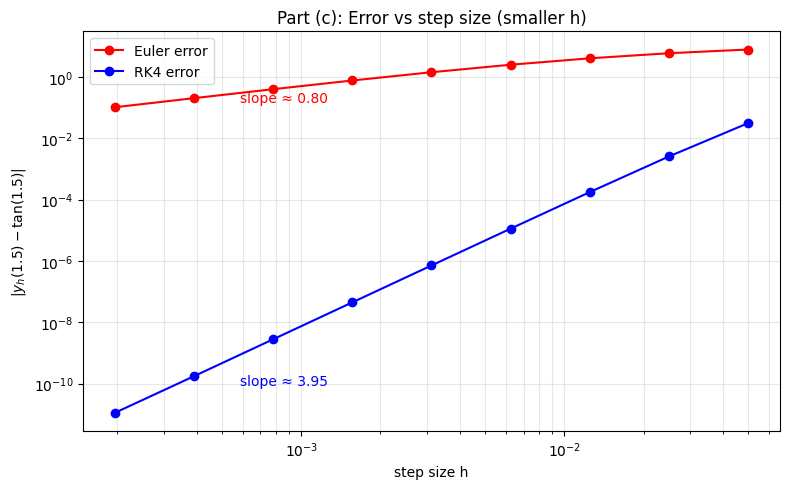

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ANSI color codes
RED   = "\033[31m"
BLUE  = "\033[34m"
GREEN = "\033[32m"
YEL   = "\033[33m"
RESET = "\033[0m"

# helper: scientific notation with Unicode superscript exponent
_sup_map = str.maketrans({
    "-": "⁻",
    "0": "⁰",
    "1": "¹",
    "2": "²",
    "3": "³",
    "4": "⁴",
    "5": "⁵",
    "6": "⁶",
    "7": "⁷",
    "8": "⁸",
    "9": "⁹",
})

def sci_sup(x, digits=3):
    """Return string like 3.347×10⁻⁴."""
    if x == 0:
        return f"{0:.{digits}f}×10⁰"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / 10**exp
    exp_str = str(exp).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

# ODE and exact solution
def f(x, y):
    return y**2 + 1

def exact_solution(x):
    return np.tan(x)
def euler(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        ys[n+1] = ys[n] + h * f(xs[n], ys[n])
    return xs, ys

def rk4(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        x, y = xs[n], ys[n]
        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.5*h, y + 0.5*h*k2)
        k4 = f(x + h,     y + h*k3)
        ys[n+1] = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return xs, ys
# ---------- PART (c) with smaller h ----------
x0, y0 = 0.0, 0.0
x_end_c = 1.5

# smaller step sizes: 0.05, 0.025, ..., 0.05/2^8
hs_c = 0.05 / (2.0 ** np.arange(0, 9))

y_true_c = exact_solution(x_end_c)
errE_c = []
errR_c = []

print(f"{GREEN}Part (c): Error at x = 1.5 for smaller step sizes{RESET}")
print(f"{YEL}h              Euler_error           RK4_error{RESET}")
for h in hs_c:
    _, yE = euler(f, x0, y0, h, x_end_c)
    _, yR = rk4(f, x0, y0, h, x_end_c)
    eE = abs(yE[-1] - y_true_c)
    eR = abs(yR[-1] - y_true_c)
    errE_c.append(eE)
    errR_c.append(eR)
    print(
        f"{h:12.8f}   "
        f"{RED}{sci_sup(eE):>16}{RESET}   "
        f"{BLUE}{sci_sup(eR):>16}{RESET}"
    )

errE_c = np.array(errE_c)
errR_c = np.array(errR_c)
# --- compute slopes (estimated order) ---
pE, _ = np.polyfit(np.log(hs_c), np.log(errE_c), 1)
pR, _ = np.polyfit(np.log(hs_c), np.log(errR_c), 1)

print(f"\n{GREEN}Estimated slope/order from log–log fit:{RESET}")
print(f"{RED}  Euler  ≈ {pE:.2f}{RESET}")
print(f"{BLUE}  RK4    ≈ {pR:.2f}{RESET}")

# Log–log error vs h plot
plt.figure(figsize=(8,5))
plt.loglog(hs_c, errE_c, 'ro-', label='Euler error')
plt.loglog(hs_c, errR_c, 'bo-', label='RK4 error')
plt.xlabel("step size h")
plt.ylabel(r"$|y_h(1.5) - \tan(1.5)|$")
plt.title("Part (c): Error vs step size (smaller h)")
plt.grid(True, which='both', alpha=0.3)
plt.legend()

# annotate slopes next to the curves (use second–finest point as anchor)
i_annot = -2  # index for annotation (second to last point)

xE = hs_c[i_annot]
yE = errE_c[i_annot]
xR = hs_c[i_annot]
yR = errR_c[i_annot]

plt.text(xE*1.5, yE, f"slope ≈ {pE:.2f}", color='red',
         fontsize=10, va='center', ha='left')
plt.text(xR*1.5, yR*0.7, f"slope ≈ {pR:.2f}", color='blue',
         fontsize=10, va='center', ha='left')

plt.tight_layout()
plt.savefig("part_c_error_vs_h.png", dpi=300)
plt.show()
